<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
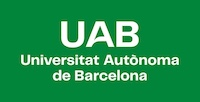
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Classes Abstractes

Suposem que volem definir un conjunt de classes per poder guardar i manipular diferents figures geomètriques: 
- cercles, 
- rectangles, 
- triangles, 
- etc. 

Utilitzant una classe `Point` per guardar punts, podem crear classes per gestionar cada tipus de figura, per exemple la classe `Cercle` i la classe `Rectangle`.

In [10]:
import math
    
class Point:
    _x: float
    _y: float
    
    def __init__(self, x = 0, y = 0):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x
    @x.setter
    def x(self, valor):
        self._x = valor

    @property
    def y(self):
        return self._y
    @y.setter
    def y(self, valor):
        self._y = valor
    
    def __sub__(self,p2):
        return math.sqrt((self.x - p2.x)**2 + (self.y - p2.y)**2)
       
    def __str__(self):  
        return "("+ str(self.x) + ", " + str(self.y) + ")"

In [11]:
import numpy as np

class Cercle:
    _centre: Point = Point(0.0,0.0)
    _radi: float = 0.0
    
    def __init__(self, centre: Point=Point(0,0), radi: float=0.0) -> None:
        self._centre = centre
        self._radi = radi

    def area(self):
        return np.pi*self._radi**2

    def perimetre(self):
        return 2*np.pi*self._radi
        
    def llegeix(self):
        print ("Coordenades del centre: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._centre = Point(x,y)
        self._radi = float(input("Radi: "))
    
    def __str__(self):
        resultat = "Centre: " + str(self._centre) + "\n"
        resultat += "Radi: " + str(self._radi) + "\n"
        return resultat

In [12]:
class Rectangle:
    _topLeft: Point = Point(0.0,0.0)
    _base: float = 0.0
    _altura: float = 0.0
    
    def __init__(self, topLeft: Point=Point(0,0), base: float=0.0, altura: float=0.0) -> None:
        self._topLeft = topLeft
        self._base = base
        self._altura = altura

    def area(self):
        return self._base * self._altura

    def perimetre(self):
        return 2 * self._base + 2 * self._altura
        
    def llegeix(self):
        print ("Coordenades de la cantonada superior esquerra: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._topLeft = Point(x,y)
        self._base = float(input("Base: "))
        self._altura = float(input("Altura: "))
    
    def __str__(self):
        resultat = "Origen: " + str(self._topLeft) + "\n" 
        resultat += "Base: " + str(self._base) + "\n" 
        resultat += "Altura: " + str(self._altura) + "\n" 
        return resultat

In [13]:
llista_figures = []

c = Cercle(Point(0,0), 1)
llista_figures.append(c)

r = Rectangle(Point(10,10), 5, 10)
llista_figures.append(r)

for figura in llista_figures:
    print(figura)
    print(figura.area(), figura.perimetre())

Centre: (0, 0)
Radi: 1

3.141592653589793 6.283185307179586
Origen: (10, 10)
Base: 5
Altura: 10

50 30


A l'exemple anterior volem guardar en una única llista objectes de la classe `Cercle` i de la classe `Rectangle` i poder-hi accedir de la mateixa forma independentment de la classe, utilitzant polimorfisme:

1. Per poder-ho fer, necessitem una classe base que agrupi la interfície comuna de les classes `Cercle` i `Rectangle`. 
2. Podem crear una classe base `Figura` que agrupi el que és comú a les dues classes. 
3. Fixem-nos que l'únic que comparteixen les dues classes és la interfície pública, la implementació dels mètodes és completament diferent i no comparteixen cap atribut. 

In [14]:
class Figura:
    def area(self):
      raise NotImplementedError()
    
    def perimetre(self):
      raise NotImplementedError()
    
    def llegeix(self):
      raise NotImplementedError()

    def __str__(self):
      raise NotImplementedError()
    
class Rectangle(Figura):
    pass

class Cercle(Figura):
    pass

Fixem-nos que la classe `Figura` no pot donar cap implementació concreta pels mètodes de la seva interfície pública (`area`, `perimetre`, ...). 

La implementació s'ha de fer **obligatòriament a les classes derivades** de forma específica a cada tipus de figura geomètrica. 

Tampoc té sentit crear objectes genèrics de la classe `Figura`. Les figures geomètriques hauran de ser sempre d'un tipus de les subclasses `Cercle` o `Rectangle`. 

La classe `Figura` ens serveix només per tenir una **interfície pública comuna**. 

Per tot això, la classe `Figura` s'ha de declarar com una **classe abstracta**.

## Classes abstractes

Característiques de la classes abastractes:

- Conté **mètodes abstractes**: mètodes que no es poden implementar a la classe base. 
- Només proporciona la interfície pública (nom i paràmetres) dels mètodes abstractes. 
- La implementació dels mètodes abstractes s’ha de fer obligatòriament  a les subclasses. Les subclasses han de donar una implementació per tots els mètodes abstractes. 
- La classe base abstracta només defineix una interfície comuna per totes les seves classes derivades. 
- No es poden crear objectes d’una classe base abstracta.

### Definició i implementació de classes abstractes

`from abc import ABCMeta, abstractmethod`

Per definir una classe com abstracta:

    class nom_classe(metaclass=ABCMeta):
    
Per indicar que un mètode és abstracte i s'haurà de definir obligatòriament a les classes derivdes:

    @abstractmethod
    def nom_metode(...):
        ...

In [15]:
from abc import ABCMeta, abstractmethod
from dataclasses import dataclass

@dataclass
class Figura(metaclass=ABCMeta):
    @abstractmethod
    def area(self):
      raise NotImplementedError()
    
    @abstractmethod
    def perimetre(self):
      raise NotImplementedError()
    
    @abstractmethod
    def llegeix(self):
      raise NotImplementedError()

    @abstractmethod
    def __str__(self):
      raise NotImplementedError()

In [16]:
f = Figura()

TypeError: Can't instantiate abstract class Figura with abstract methods __str__, area, llegeix, perimetre

In [17]:
class Rectangle(Figura):
    _topLeft: Point = Point(0.0,0.0)
    _base: float = 0.0
    _altura: float = 0.0
    
    def __init__(self, topLeft: Point=Point(0,0), base: float=0.0, altura: float=0.0) -> None:
        self._topLeft = topLeft
        self._base = base
        self._altura = altura

    def area(self):
        return self._base * self._altura

    def perimetre(self):
        return 2 * self._base + 2 * self._altura
        
    def llegeix(self):
        print ("Coordenades de la cantonada superior esquerra: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._topLeft = Point(x,y)
        self._base = float(input("Base: "))
        self._altura = float(input("Altura: "))
    
    def __str__(self):
        resultat = "Origen: " + str(self._topLeft) + "\n" 
        resultat += "Base: " + str(self._base) + "\n" 
        resultat += "Altura: " + str(self._altura) + "\n" 
        return resultat

In [18]:
import numpy as np

class Cercle(Figura):
    _centre: Point = Point(0,0)
    _radi: float = 0.0
    
    def __init__(self, centre: Point=Point(0,0), radi: float=0.0) -> None:
        self._centre = centre
        self._radi = radi

    def area(self):
        return np.pi*self._radi**2

    def perimetre(self):
        return 2*np.pi*self._radi
        
    def llegeix(self):
        print ("Coordenades del centre: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._centre = Point(x,y)
        self._radi = float(input("Radi: "))
    
    def __str__(self):
        resultat = "Centre: " + str(self._centre) + "\n"
        resultat += "Radi: " + str(self._radi) + "\n"
        return resultat

In [19]:
llista_figures = []

c = Cercle(Point(0,0), 1)
llista_figures.append(c)

r = Rectangle(Point(10,10), 5, 10)
llista_figures.append(r)

for figura in llista_figures:
    print(figura)
    print(figura.area(), figura.perimetre())

Centre: (0, 0)
Radi: 1

3.141592653589793 6.283185307179586
Origen: (10, 10)
Base: 5
Altura: 10

50 30


Apart de la interfície comuna de les classes derivades, les **classes abstractes** poden tenir també els seus **propis atributs i mètodes no abstractes** que són heretats i poden ser utilitzats per les classes derivades, igual que en l'herència de classes no abstractes.

Els mètodes abstractes de la classe base poden contenir part de la implementació comuna del mètode, que pot ser utilitzada pels mètodes de les classes derivades accedint amb `super()`, igual que amb l'herència de classes no abstractes. 

### Afegir atributs comuns

Anem a modificar la jerarquia de classes anterior de `Figura` - `Cercle`/`Rectangle` per  guardar també l'amplada i l'alçada de totes les figures i tenir mètodes comuns a la classe base que permetin recuperar el seu valor. 

Quan es converteix una figura en un _string_ també s'hi ha d'afegir l'amplada i l'alçada.

In [20]:
from abc import ABCMeta, abstractmethod

class Figura(metaclass=ABCMeta):
    
    @property
    @abstractmethod
    def amplada(self):
        pass
    
    @property
    @abstractmethod
    def alcada(self):
        pass
    
    @abstractmethod
    def area(self):
      raise NotImplementedError()
    
    @abstractmethod
    def perimetre(self):
      raise NotImplementedError()
    
    @abstractmethod
    def llegeix(self):
      raise NotImplementedError()

    @abstractmethod
    def __str__(self):
        resultat = "Amplada: " + str(self.amplada) + "\n"
        resultat += "Alcada: " + str(self.alcada) + "\n"
        return resultat

In [21]:
class Rectangle(Figura):
    _topLeft: Point = Point(0.0,0.0)
    _base: float = 0.0
    _altura: float = 0.0
    
    def __init__(self, topLeft: Point=Point(0,0), base: float=0.0, altura: float=0.0) -> None:
        self._topLeft = topLeft
        self._base = base
        self._altura = altura

    @property
    def amplada(self):
        return self._base
    
    @property
    def alcada(self):
        return self._altura
    
    def area(self):
        return self._base * self._altura

    def perimetre(self):
        return 2 * self._base + 2 * self._altura
        
    def llegeix(self):
        print ("Coordenades de la cantonada superior esquerra: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._topLeft = Point(x,y)
        self._base = float(input("Base: "))
        self._altura = float(input("Altura: "))
    
    def __str__(self):
        resultat = "Origen: " + str(self._topLeft) + "\n" 
        resultat += "Base: " + str(self._base) + "\n" 
        resultat += "Altura: " + str(self._altura) + "\n" 
        resultat += super().__str__()
        return resultat

In [22]:
import numpy as np

class Cercle(Figura):
    _centre: Point = Point(0,0)
    _radi: float = 0.0
    
    def __init__(self, centre: Point=Point(0,0), radi: float=0.0) -> None:
        self._centre = centre
        self._radi = radi

    def __post_init__(self):
        self._amplada = self._radi*2
        self._alcada = self._radi*2

    @property
    def amplada(self):
        return self._radi*2
    
    @property
    def alcada(self):
        return self._radi*2
    
    def area(self):
        return np.pi*self._radi**2

    def perimetre(self):
        return 2*np.pi*self._radi
        
    def llegeix(self):
        print ("Coordenades del centre: ")
        x = float(input("x: "))
        y = float(input("y: "))
        self._centre = Point(x,y)
        self._radi = float(input("Radi: "))
    
    def __str__(self):
        resultat = "Centre: " + str(self._centre) + "\n"
        resultat += "Radi: " + str(self._radi) + "\n"
        resultat += super().__str__()
        return resultat

In [23]:
llista_figures = []

c = Cercle(Point(0,0), 1)
llista_figures.append(c)

r = Rectangle(Point(10,10), 5, 10)
llista_figures.append(r)

for figura in llista_figures:
    print(figura)
    print(figura.area(), figura.perimetre())

Centre: (0, 0)
Radi: 1
Amplada: 2
Alcada: 2

3.141592653589793 6.283185307179586
Origen: (10, 10)
Base: 5
Altura: 10
Amplada: 5
Alcada: 10

50 30
